# Loan Status Prediction 

Importing the Pandas and the Numpy libraries.

In [2]:
import pandas as pd
import numpy as np

Importing the dataset 

In [3]:
df_train = pd.read_csv("train.csv",encoding = 'UTF-8')
df_test = pd.read_csv("test.csv",encoding = 'UTF-8')

In [4]:
df_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [5]:
df_test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [6]:
df_train['which_data'] = 'data_train'
df_test['which_data'] = 'data_test'

Combining the two datasets into single dataset

In [7]:
df_all = pd.concat([df_train,df_test],axis = 0)

In [8]:
df_all

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,which_data
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,data_train
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,data_train
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,data_train
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,data_train
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,data_train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777.0,113.0,360.0,1.0,Urban,NaN,data_test
363,LP002975,Male,Yes,0,Graduate,No,4158,709.0,115.0,360.0,1.0,Urban,NaN,data_test
364,LP002980,Male,No,0,Graduate,No,3250,1993.0,126.0,360.0,NaN,Semiurban,NaN,data_test
365,LP002986,Male,Yes,0,Graduate,No,5000,2393.0,158.0,360.0,1.0,Rural,NaN,data_test


In [9]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        614 non-null    object 
 13  which_data         981 non-null    object 
dtypes: float64(4), int64(1), object(9)
memory usage: 115.0+ KB


In [10]:
median_value = df_all['ApplicantIncome'].median()
df_all['ApplicantIncome'] = df_all['ApplicantIncome'].fillna(median_value)

median_value = df_all['CoapplicantIncome'].median()
df_all['CoapplicantIncome'] = df_all['CoapplicantIncome'].fillna(median_value)

median_value = df_all['LoanAmount'].median()
df_all['LoanAmount'] = df_all['LoanAmount'].fillna(median_value)

median_value = df_all['Loan_Amount_Term'].median()
df_all['Loan_Amount_Term'] = df_all['Loan_Amount_Term'].fillna(median_value)

median_value = df_all['Credit_History'].median()
df_all['Credit_History'] = df_all['Credit_History'].fillna(median_value)


In [11]:
df_all.fillna(method = 'ffill',axis = 1)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,which_data
0,LP001002,Male,No,0,Graduate,No,5849,0,126,360,1,Urban,Y,data_train
1,LP001003,Male,Yes,1,Graduate,No,4583,1508,128,360,1,Rural,N,data_train
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0,66,360,1,Urban,Y,data_train
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358,120,360,1,Urban,Y,data_train
4,LP001008,Male,No,0,Graduate,No,6000,0,141,360,1,Urban,Y,data_train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113,360,1,Urban,Urban,data_test
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115,360,1,Urban,Urban,data_test
364,LP002980,Male,No,0,Graduate,No,3250,1993,126,360,1,Semiurban,Semiurban,data_test
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158,360,1,Rural,Rural,data_test


Cleaning the dataset

In [12]:
df_all = df_all.mask(df_all == 0).fillna(df_all.mean())
df_all

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,which_data
0,LP001002,Male,No,0,Graduate,No,5849.0,1601.91633,126.0,360.0,1.0,Urban,Y,data_train
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.00000,128.0,360.0,1.0,Rural,N,data_train
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,1601.91633,66.0,360.0,1.0,Urban,Y,data_train
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.00000,120.0,360.0,1.0,Urban,Y,data_train
4,LP001008,Male,No,0,Graduate,No,6000.0,1601.91633,141.0,360.0,1.0,Urban,Y,data_train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009.0,1777.00000,113.0,360.0,1.0,Urban,NaN,data_test
363,LP002975,Male,Yes,0,Graduate,No,4158.0,709.00000,115.0,360.0,1.0,Urban,NaN,data_test
364,LP002980,Male,No,0,Graduate,No,3250.0,1993.00000,126.0,360.0,1.0,Semiurban,NaN,data_test
365,LP002986,Male,Yes,0,Graduate,No,5000.0,2393.00000,158.0,360.0,1.0,Rural,NaN,data_test


Drop all the null values 

In [13]:
df_all = df_all.dropna()
print(df_all)

      Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849.0         1601.91633       126.0           

In [14]:
df_all.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
which_data           0
dtype: int64

In [15]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 554 entries, 0 to 613
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            554 non-null    object 
 1   Gender             554 non-null    object 
 2   Married            554 non-null    object 
 3   Dependents         554 non-null    object 
 4   Education          554 non-null    object 
 5   Self_Employed      554 non-null    object 
 6   ApplicantIncome    554 non-null    float64
 7   CoapplicantIncome  554 non-null    float64
 8   LoanAmount         554 non-null    float64
 9   Loan_Amount_Term   554 non-null    float64
 10  Credit_History     554 non-null    float64
 11  Property_Area      554 non-null    object 
 12  Loan_Status        554 non-null    object 
 13  which_data         554 non-null    object 
dtypes: float64(5), object(9)
memory usage: 64.9+ KB


Multivariate analysis using pairplot

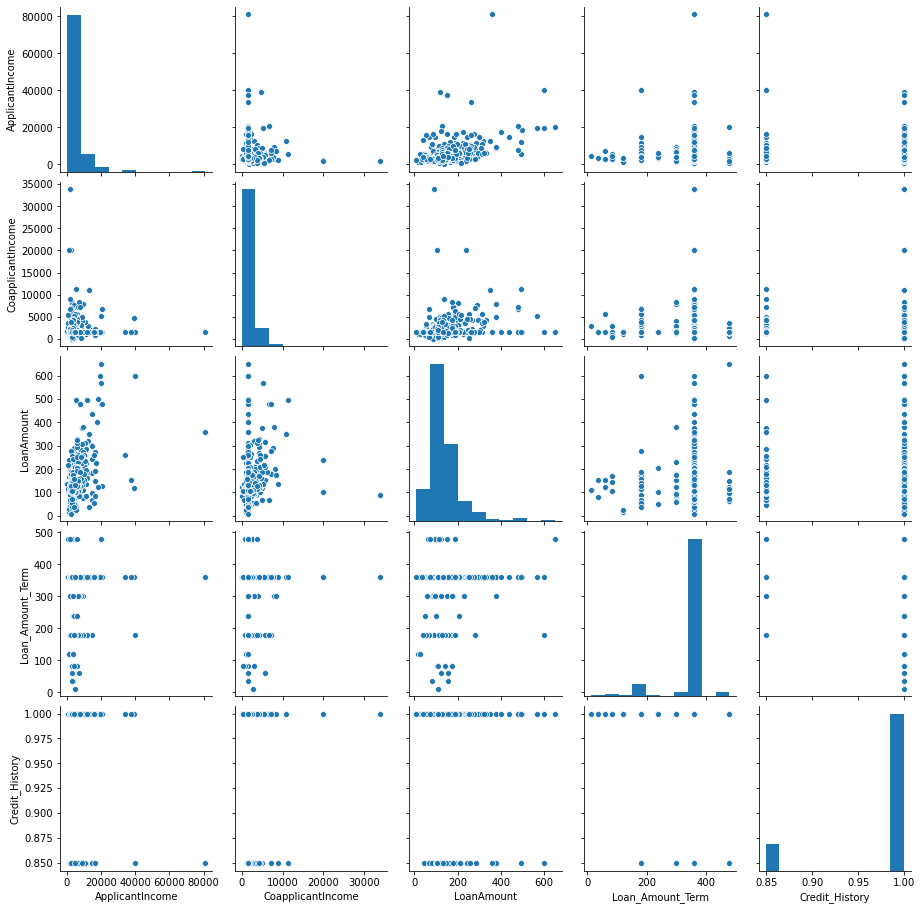

In [16]:
import seaborn as sns
sns.pairplot(df_all)

In [17]:
df1 = pd.get_dummies(df_all,columns = ['Loan_ID','Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status','which_data'],drop_first = True)

In [18]:
df_all.shape

(554, 14)

Checking and Assigning the unique values of the columns

In [19]:
df_all['Gender'].unique()
df_all['Gender'].value_counts()

Male      453
Female    101
Name: Gender, dtype: int64

In [20]:
df_all['Married'].unique()
df_all['Married'].value_counts()

Yes    362
No     192
Name: Married, dtype: int64

In [21]:
df_all['Self_Employed'].unique()
df_all['Self_Employed'].value_counts()

No     478
Yes     76
Name: Self_Employed, dtype: int64

In [22]:
df_all['Education'].unique()
df_all['Education'].value_counts()

Graduate        431
Not Graduate    123
Name: Education, dtype: int64

In [23]:
df_all['Property_Area'].unique()
df_all['Property_Area'].value_counts()

Semiurban    211
Urban        180
Rural        163
Name: Property_Area, dtype: int64

In [24]:
df_all['Loan_Status'].unique()
df_all['Loan_Status'].value_counts()

Y    382
N    172
Name: Loan_Status, dtype: int64

In [25]:
Value_Mapping = {'Yes' : 1, 'No' : 0}
df_all['Married_Section'] = df_all['Married'].map(Value_Mapping)
df_all.head(5)

<ipython-input-25-811cff31830d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all['Married_Section'] = df_all['Married'].map(Value_Mapping)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,which_data,Married_Section
0,LP001002,Male,No,0,Graduate,No,5849.0,1601.91633,126.0,360.0,1.0,Urban,Y,data_train,0
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.00000,128.0,360.0,1.0,Rural,N,data_train,1
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,1601.91633,66.0,360.0,1.0,Urban,Y,data_train,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.00000,120.0,360.0,1.0,Urban,Y,data_train,1
4,LP001008,Male,No,0,Graduate,No,6000.0,1601.91633,141.0,360.0,1.0,Urban,Y,data_train,0


In [26]:
Value_Mapping1 = {'Male' : 1, 'Female' : 0}
df_all['Gender_Section'] = df_all['Gender'].map(Value_Mapping1)
df_all.head(5)

<ipython-input-26-702a8969db24>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all['Gender_Section'] = df_all['Gender'].map(Value_Mapping1)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,which_data,Married_Section,Gender_Section
0,LP001002,Male,No,0,Graduate,No,5849.0,1601.91633,126.0,360.0,1.0,Urban,Y,data_train,0,1
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.00000,128.0,360.0,1.0,Rural,N,data_train,1,1
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,1601.91633,66.0,360.0,1.0,Urban,Y,data_train,1,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.00000,120.0,360.0,1.0,Urban,Y,data_train,1,1
4,LP001008,Male,No,0,Graduate,No,6000.0,1601.91633,141.0,360.0,1.0,Urban,Y,data_train,0,1


In [27]:
Value_Mapping2 = {'Graduate' : 1, 'Not Graduate' : 0}
df_all['Edu_Section'] = df_all['Education'].map(Value_Mapping2)
df_all.head(5)

<ipython-input-27-a2222607b04c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all['Edu_Section'] = df_all['Education'].map(Value_Mapping2)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,which_data,Married_Section,Gender_Section,Edu_Section
0,LP001002,Male,No,0,Graduate,No,5849.0,1601.91633,126.0,360.0,1.0,Urban,Y,data_train,0,1,1
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.00000,128.0,360.0,1.0,Rural,N,data_train,1,1,1
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,1601.91633,66.0,360.0,1.0,Urban,Y,data_train,1,1,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.00000,120.0,360.0,1.0,Urban,Y,data_train,1,1,0
4,LP001008,Male,No,0,Graduate,No,6000.0,1601.91633,141.0,360.0,1.0,Urban,Y,data_train,0,1,1


In [28]:
Value_Mapping3 = {'Yes' : 1, 'No' : 0}
df_all['Employed_Section'] = df_all['Self_Employed'].map(Value_Mapping3)
df_all.head(5)

<ipython-input-28-d4b602ca0522>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all['Employed_Section'] = df_all['Self_Employed'].map(Value_Mapping3)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,which_data,Married_Section,Gender_Section,Edu_Section,Employed_Section
0,LP001002,Male,No,0,Graduate,No,5849.0,1601.91633,126.0,360.0,1.0,Urban,Y,data_train,0,1,1,0
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.00000,128.0,360.0,1.0,Rural,N,data_train,1,1,1,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,1601.91633,66.0,360.0,1.0,Urban,Y,data_train,1,1,1,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.00000,120.0,360.0,1.0,Urban,Y,data_train,1,1,0,0
4,LP001008,Male,No,0,Graduate,No,6000.0,1601.91633,141.0,360.0,1.0,Urban,Y,data_train,0,1,1,0


In [29]:
Value_Mapping4 = {'Y' : 1, 'N' : 0}
df_all['Loan_Section'] = df_all['Loan_Status'].map(Value_Mapping4)
df_all.head(5)

<ipython-input-29-1c5c18832c39>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all['Loan_Section'] = df_all['Loan_Status'].map(Value_Mapping4)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,which_data,Married_Section,Gender_Section,Edu_Section,Employed_Section,Loan_Section
0,LP001002,Male,No,0,Graduate,No,5849.0,1601.91633,126.0,360.0,1.0,Urban,Y,data_train,0,1,1,0,1
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.00000,128.0,360.0,1.0,Rural,N,data_train,1,1,1,0,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,1601.91633,66.0,360.0,1.0,Urban,Y,data_train,1,1,1,1,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.00000,120.0,360.0,1.0,Urban,Y,data_train,1,1,0,0,1
4,LP001008,Male,No,0,Graduate,No,6000.0,1601.91633,141.0,360.0,1.0,Urban,Y,data_train,0,1,1,0,1


In [30]:
Value_Mapping5 = {'Urban' : 1, 'Rural' : 0,'Semiurban':2}
df_all['Propertyarea_Section'] = df_all['Property_Area'].map(Value_Mapping5)
df_all.head(5)

<ipython-input-30-b6383188c0d9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all['Propertyarea_Section'] = df_all['Property_Area'].map(Value_Mapping5)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,which_data,Married_Section,Gender_Section,Edu_Section,Employed_Section,Loan_Section,Propertyarea_Section
0,LP001002,Male,No,0,Graduate,No,5849.0,1601.91633,126.0,360.0,1.0,Urban,Y,data_train,0,1,1,0,1,1
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.00000,128.0,360.0,1.0,Rural,N,data_train,1,1,1,0,0,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,1601.91633,66.0,360.0,1.0,Urban,Y,data_train,1,1,1,1,1,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.00000,120.0,360.0,1.0,Urban,Y,data_train,1,1,0,0,1,1
4,LP001008,Male,No,0,Graduate,No,6000.0,1601.91633,141.0,360.0,1.0,Urban,Y,data_train,0,1,1,0,1,1


In [31]:
Value_Mapping = {'Y' : 1, 'N' : 0}
df_all['Loan_Status'] = df_all['Loan_Status'].map(Value_Mapping)
df_all.head(5)

<ipython-input-31-772701f256a3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all['Loan_Status'] = df_all['Loan_Status'].map(Value_Mapping)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,which_data,Married_Section,Gender_Section,Edu_Section,Employed_Section,Loan_Section,Propertyarea_Section
0,LP001002,Male,No,0,Graduate,No,5849.0,1601.91633,126.0,360.0,1.0,Urban,1,data_train,0,1,1,0,1,1
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.00000,128.0,360.0,1.0,Rural,0,data_train,1,1,1,0,0,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,1601.91633,66.0,360.0,1.0,Urban,1,data_train,1,1,1,1,1,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.00000,120.0,360.0,1.0,Urban,1,data_train,1,1,0,0,1,1
4,LP001008,Male,No,0,Graduate,No,6000.0,1601.91633,141.0,360.0,1.0,Urban,1,data_train,0,1,1,0,1,1


In [32]:
df = df_all.drop(['Loan_ID','Gender','Married','Education','Self_Employed','Property_Area','which_data'],axis = 1)
df

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Married_Section,Gender_Section,Edu_Section,Employed_Section,Loan_Section,Propertyarea_Section
0,0,5849.0,1601.91633,126.0,360.0,1.000000,1,0,1,1,0,1,1
1,1,4583.0,1508.00000,128.0,360.0,1.000000,0,1,1,1,0,0,0
2,0,3000.0,1601.91633,66.0,360.0,1.000000,1,1,1,1,1,1,1
3,0,2583.0,2358.00000,120.0,360.0,1.000000,1,1,1,0,0,1,1
4,0,6000.0,1601.91633,141.0,360.0,1.000000,1,0,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,2900.0,1601.91633,71.0,360.0,1.000000,1,0,0,1,0,1,0
610,3+,4106.0,1601.91633,40.0,180.0,1.000000,1,1,1,1,0,1,0
611,1,8072.0,240.00000,253.0,360.0,1.000000,1,1,1,1,0,1,1
612,2,7583.0,1601.91633,187.0,360.0,1.000000,1,1,1,1,0,1,1


Finding the correlation 

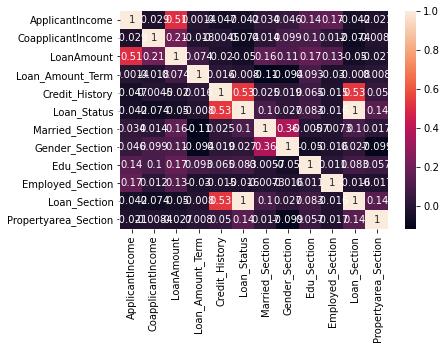

In [33]:
correlation = df.corr()
sns.heatmap(correlation,xticklabels = correlation.columns,yticklabels = correlation.columns,annot = True)

In [34]:
df

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Married_Section,Gender_Section,Edu_Section,Employed_Section,Loan_Section,Propertyarea_Section
0,0,5849.0,1601.91633,126.0,360.0,1.000000,1,0,1,1,0,1,1
1,1,4583.0,1508.00000,128.0,360.0,1.000000,0,1,1,1,0,0,0
2,0,3000.0,1601.91633,66.0,360.0,1.000000,1,1,1,1,1,1,1
3,0,2583.0,2358.00000,120.0,360.0,1.000000,1,1,1,0,0,1,1
4,0,6000.0,1601.91633,141.0,360.0,1.000000,1,0,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,2900.0,1601.91633,71.0,360.0,1.000000,1,0,0,1,0,1,0
610,3+,4106.0,1601.91633,40.0,180.0,1.000000,1,1,1,1,0,1,0
611,1,8072.0,240.00000,253.0,360.0,1.000000,1,1,1,1,0,1,1
612,2,7583.0,1601.91633,187.0,360.0,1.000000,1,1,1,1,0,1,1


In [35]:
df=df.select_dtypes(include=['float64','int64'])

In [36]:
y = df["Loan_Status"]
X = df.drop("Loan_Status",axis=1)

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 42)

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [39]:
from sklearn.ensemble import RandomForestRegressor
forest=RandomForestRegressor()

In [40]:
forest.fit(X_train,y_train)

RandomForestRegressor()

In [41]:
forest.score(X_test,y_test)

1.0

In [42]:
from sklearn.tree import DecisionTreeRegressor 
regressor = DecisionTreeRegressor()  
regressor.fit(X, y)

DecisionTreeRegressor()

In [43]:
regressor.score(X_test,y_test)

1.0

In [44]:
from sklearn.ensemble import RandomForestRegressor 
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0) 
regressor.fit(X, y)  
regressor.score(X_test,y_test)

1.0

In [45]:
from sklearn.ensemble import VotingClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score 
estimator = [] 
estimator.append(('LR',  
                  LogisticRegression(solver ='lbfgs',  
                                     multi_class ='multinomial',  
                                     max_iter = 200))) 
estimator.append(('SVC', SVC(gamma ='auto', probability = True))) 
estimator.append(('DTC', DecisionTreeClassifier())) 
vot_hard = VotingClassifier(estimators = estimator, voting ='hard') 
vot_hard.fit(X_train, y_train) 
y_pred = vot_hard.predict(X_test) 
score = accuracy_score(y_test, y_pred) 
print("Hard Voting Score % d" % score) 
vot_soft = VotingClassifier(estimators = estimator, voting ='soft') 
vot_soft.fit(X_train, y_train) 
y_pred = vot_soft.predict(X_test) 
score = accuracy_score(y_test, y_pred) 
print("Soft Voting Score % d" % score) 


Hard Voting Score  1
Soft Voting Score  1


In [48]:
import xgboost as xgb 
my_model = xgb.XGBClassifier() 
my_model.fit(X_train, y_train) 

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [49]:
y_pred = my_model.predict(X_test) 

In [50]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test, y_pred) 
cm

array([[41,  0],
       [ 0, 98]], dtype=int64)

In [51]:
from sklearn.metrics import mean_squared_error as MSE 
import xgboost as xg 
xgb_r = xg.XGBRegressor(objective ='reg:linear', 
                  n_estimators = 10, seed = 123) 
xgb_r.fit(X_train, y_train) 
pred = xgb_r.predict(X_test) 
rmse = np.sqrt(MSE(y_test, pred)) 
print("RMSE : % f" %(rmse)) 

[11:03:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[11:03:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
RMSE :  0.014412


In [52]:
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB() 
gnb.fit(X_train, y_train) 
  
# making predictions on the testing set 
y_pred = gnb.predict(X_test) 
from sklearn import metrics 
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)  

Gaussian Naive Bayes model accuracy(in %): 100.0


In [53]:
from sklearn.svm import SVC 
clf = SVC(kernel='linear') 
clf.fit(X_train, y_train) 
clf.score(X_test,y_test)

1.0